In [268]:
import os
import pandas as pd
import numpy as np
from pandas.tseries import offsets
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import seaborn as sns
import matplotlib.pyplot as plt

In [269]:
PATH_FOLDER = os.path.join(os.getcwd(), r"C:\Users\Lenovo\Desktop\Master Data Science - Nuclio Digital School\Projects\TimeSeries\Data")

merged = os.path.join(PATH_FOLDER, 'df_merged.csv')

df_merged = pd.read_csv(merged)
df_merged = df_merged.sample(2000000)
df_merged

,Unnamed: 0,id,item,category_x,department,store,store_code_x,region,d,date,weekday,weekday_int,category_y,store_code_y,yearweek,sell_price
23517380,23517380,SUPERMARKET_2_368_NYC_4,SUPERMARKET_2_368,SUPERMARKET,SUPERMARKET_2,Brooklyn,NYC_4,New York,d_606,2012-09-25,Tuesday,4,SUPERMARKET,BOS_3,201111.0,8.3760
6098406,6098406,ACCESORIES_1_255_PHI_1,ACCESORIES_1_255,ACCESORIES,ACCESORIES_1,Midtown_Village,PHI_1,Philadelphia,d_442,2012-04-14,Saturday,1,ACCESORIES,NYC_3,201239.0,2.5004
5704386,5704386,HOME_&_GARDEN_1_442_BOS_2,HOME_&_GARDEN_1_442,HOME_&_GARDEN,HOME_&_GARDEN_1,Roxbury,BOS_2,Boston,d_1331,2014-09-20,Saturday,1,HOME_&_GARDEN,NYC_3,201537.0,11.2125
1444108,1444108,HOME_&_GARDEN_2_087_NYC_1,HOME_&_GARDEN_2_087,HOME_&_GARDEN,HOME_&_GARDEN_2,Greenwich_Village,NYC_1,New York,d_396,2012-02-28,Tuesday,4,HOME_&_GARDEN,NYC_1,201235.0,9.9250
3650735,3650735,HOME_&_GARDEN_1_114_PHI_2,HOME_&_GARDEN_1_114,HOME_&_GARDEN,HOME_&_GARDEN_1,Yorktown,PHI_2,Philadelphia,d_53,2011-03-22,Tuesday,4,HOME_&_GARDEN,BOS_2,201105.0,1.2125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4719720,4719720,SUPERMARKET_3_528_BOS_3,SUPERMARKET_3_528,SUPERMARKET,SUPERMARKET_3,Back_Bay,BOS_3,Boston,d_1485,2015-02-21,Saturday,1,SUPERMARKET,PHI_1,201537.0,5.9760
11621410,11621410,HOME_&_GARDEN_2_276_PHI_1,HOME_&_GARDEN_2_276,HOME_&_GARDEN,HOME_&_GARDEN_2,Midtown_Village,PHI_1,Philadelphia,d_801,2013-04-08,Monday,3,HOME_&_GARDEN,PHI_1,201425.0,6.8375
23708544,23708544,SUPERMARKET_2_032_BOS_3,SUPERMARKET_2_032,SUPERMARKET,SUPERMARKET_2,Back_Bay,BOS_3,Boston,d_1410,2014-12-08,Monday,3,SUPERMARKET,NYC_4,201428.0,2.6160
20497533,20497533,SUPERMARKET_3_724_PHI_1,SUPERMARKET_3_724,SUPERMARKET,SUPERMARKET_3,Midtown_Village,PHI_1,Philadelphia,d_766,2013-03-04,Monday,3,SUPERMARKET,NYC_3,201118.0,8.2560


In [270]:
df_merged = df_merged.copy()
df_merged.columns

Index(['Unnamed: 0', 'id', 'item', 'category_x', 'department', 'store',
       'store_code_x', 'region', 'd', 'date', 'weekday', 'weekday_int',
       'category_y', 'store_code_y', 'yearweek', 'sell_price'],
      dtype='object')

In [271]:

df_merged = df_merged[['id', 'item', 'category_x', 'department', 'store',
       'store_code_x', 'region','date', 'weekday_int',
         'sell_price']]
df_merged.rename(columns={
    'id': 'item_store',
    'region': '1_region',
    'store': '2_store',
    'store_code_x': '3_sub_store',
    'category_x': '4_category',
    'department': '5_item',
    # 'department': '6_item',
    
    

}, inplace=True)
df_merged

,item_store,item,4_category,5_item,2_store,3_sub_store,1_region,date,weekday_int,sell_price
23517380,SUPERMARKET_2_368_NYC_4,SUPERMARKET_2_368,SUPERMARKET,SUPERMARKET_2,Brooklyn,NYC_4,New York,2012-09-25,4,8.3760
6098406,ACCESORIES_1_255_PHI_1,ACCESORIES_1_255,ACCESORIES,ACCESORIES_1,Midtown_Village,PHI_1,Philadelphia,2012-04-14,1,2.5004
5704386,HOME_&_GARDEN_1_442_BOS_2,HOME_&_GARDEN_1_442,HOME_&_GARDEN,HOME_&_GARDEN_1,Roxbury,BOS_2,Boston,2014-09-20,1,11.2125
1444108,HOME_&_GARDEN_2_087_NYC_1,HOME_&_GARDEN_2_087,HOME_&_GARDEN,HOME_&_GARDEN_2,Greenwich_Village,NYC_1,New York,2012-02-28,4,9.9250
3650735,HOME_&_GARDEN_1_114_PHI_2,HOME_&_GARDEN_1_114,HOME_&_GARDEN,HOME_&_GARDEN_1,Yorktown,PHI_2,Philadelphia,2011-03-22,4,1.2125
...,...,...,...,...,...,...,...,...,...,...
4719720,SUPERMARKET_3_528_BOS_3,SUPERMARKET_3_528,SUPERMARKET,SUPERMARKET_3,Back_Bay,BOS_3,Boston,2015-02-21,1,5.9760
11621410,HOME_&_GARDEN_2_276_PHI_1,HOME_&_GARDEN_2_276,HOME_&_GARDEN,HOME_&_GARDEN_2,Midtown_Village,PHI_1,Philadelphia,2013-04-08,3,6.8375
23708544,SUPERMARKET_2_032_BOS_3,SUPERMARKET_2_032,SUPERMARKET,SUPERMARKET_2,Back_Bay,BOS_3,Boston,2014-12-08,3,2.6160
20497533,SUPERMARKET_3_724_PHI_1,SUPERMARKET_3_724,SUPERMARKET,SUPERMARKET_3,Midtown_Village,PHI_1,Philadelphia,2013-03-04,3,8.2560


In [272]:
df_merged.drop_duplicates(inplace=True)

def data_report(df):
    
    # Información general
    print("Información general:\n")
    print(df.info())
    print("\n")
    
    # Resumen estadístico
    print("Resumen estadístico:\n")
    print(df.describe())
    print("\n")
    
    # Valores nulos
    print("Valores nulos:\n")
    print(df.isnull().sum())
    print("\n")
    
    # Valores únicos
    print("Valores únicos:\n")
    for col in df.columns:
        print(col, ":", df[col].nunique())
    print("\n")
    
    # Valores repetidos
    print("Valores repetidos:\n")
    print(df.duplicated().sum())
    print("\n")
    
    # Distribución de valores categóricos
    print("Distribución de valores categóricos:\n")
    for col in df.select_dtypes(include=["object"]).columns:
        print(col, ":\n", df[col].value_counts(normalize=True), "\n")

data_report(df_merged)

Información general:

<class 'pandas.core.frame.DataFrame'>
Index: 605682 entries, 23517380 to 23959381
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   item_store   605682 non-null  object 
 1   item         605682 non-null  object 
 2   4_category   605682 non-null  object 
 3   5_item       605682 non-null  object 
 4   2_store      605682 non-null  object 
 5   3_sub_store  605682 non-null  object 
 6   1_region     605682 non-null  object 
 7   date         605682 non-null  object 
 8   weekday_int  605682 non-null  int64  
 9   sell_price   605682 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 50.8+ MB
None


Resumen estadístico:

         weekday_int     sell_price
count  605682.000000  605682.000000
mean        3.990521       5.539598
std         1.996008       4.511980
min         1.000000       0.012000
25%         2.000000       2.633400
50%         4.000000       4.176000
75%

In [273]:
# df_merged.set_index('date', inplace=True)


In [274]:
df_merged.sort_index(inplace=True)

In [275]:
df_merged

,item_store,item,4_category,5_item,2_store,3_sub_store,1_region,date,weekday_int,sell_price
37,SUPERMARKET_3_235_BOS_1,SUPERMARKET_3_235,SUPERMARKET,SUPERMARKET_3,South_End,BOS_1,Boston,2014-02-09,2,2.0880
75,SUPERMARKET_3_235_BOS_1,SUPERMARKET_3_235,SUPERMARKET,SUPERMARKET_3,South_End,BOS_1,Boston,2014-02-09,2,2.3760
161,SUPERMARKET_3_235_PHI_2,SUPERMARKET_3_235,SUPERMARKET,SUPERMARKET_3,Yorktown,PHI_2,Philadelphia,2012-10-31,5,2.0880
188,SUPERMARKET_3_235_PHI_2,SUPERMARKET_3_235,SUPERMARKET,SUPERMARKET_3,Yorktown,PHI_2,Philadelphia,2012-10-31,5,2.3760
293,SUPERMARKET_3_235_PHI_2,SUPERMARKET_3_235,SUPERMARKET,SUPERMARKET_3,Yorktown,PHI_2,Philadelphia,2015-06-13,1,2.0880
...,...,...,...,...,...,...,...,...,...,...
29529119,HOME_&_GARDEN_1_047_PHI_2,HOME_&_GARDEN_1_047,HOME_&_GARDEN,HOME_&_GARDEN_1,Yorktown,PHI_2,Philadelphia,2012-11-19,3,5.2875
29529124,HOME_&_GARDEN_1_047_PHI_2,HOME_&_GARDEN_1_047,HOME_&_GARDEN,HOME_&_GARDEN_1,Yorktown,PHI_2,Philadelphia,2012-11-19,3,4.9625
29529169,HOME_&_GARDEN_1_047_BOS_2,HOME_&_GARDEN_1_047,HOME_&_GARDEN,HOME_&_GARDEN_1,Roxbury,BOS_2,Boston,2015-12-30,5,5.2875
29529204,HOME_&_GARDEN_1_047_BOS_2,HOME_&_GARDEN_1_047,HOME_&_GARDEN,HOME_&_GARDEN_1,Roxbury,BOS_2,Boston,2015-12-30,5,4.9625


In [276]:
df_merged['sales'] = 1
df_merged['revenue'] = df_merged['sales']*df_merged['sell_price']
df_merged['unique_days_sales'] = 1
df_merged['total_transactions'] = df_merged['sales']
df_merged

,item_store,item,4_category,5_item,2_store,3_sub_store,1_region,date,weekday_int,sell_price,sales,revenue,unique_days_sales,total_transactions
37,SUPERMARKET_3_235_BOS_1,SUPERMARKET_3_235,SUPERMARKET,SUPERMARKET_3,South_End,BOS_1,Boston,2014-02-09,2,2.0880,1,2.0880,1,1
75,SUPERMARKET_3_235_BOS_1,SUPERMARKET_3_235,SUPERMARKET,SUPERMARKET_3,South_End,BOS_1,Boston,2014-02-09,2,2.3760,1,2.3760,1,1
161,SUPERMARKET_3_235_PHI_2,SUPERMARKET_3_235,SUPERMARKET,SUPERMARKET_3,Yorktown,PHI_2,Philadelphia,2012-10-31,5,2.0880,1,2.0880,1,1
188,SUPERMARKET_3_235_PHI_2,SUPERMARKET_3_235,SUPERMARKET,SUPERMARKET_3,Yorktown,PHI_2,Philadelphia,2012-10-31,5,2.3760,1,2.3760,1,1
293,SUPERMARKET_3_235_PHI_2,SUPERMARKET_3_235,SUPERMARKET,SUPERMARKET_3,Yorktown,PHI_2,Philadelphia,2015-06-13,1,2.0880,1,2.0880,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29529119,HOME_&_GARDEN_1_047_PHI_2,HOME_&_GARDEN_1_047,HOME_&_GARDEN,HOME_&_GARDEN_1,Yorktown,PHI_2,Philadelphia,2012-11-19,3,5.2875,1,5.2875,1,1
29529124,HOME_&_GARDEN_1_047_PHI_2,HOME_&_GARDEN_1_047,HOME_&_GARDEN,HOME_&_GARDEN_1,Yorktown,PHI_2,Philadelphia,2012-11-19,3,4.9625,1,4.9625,1,1
29529169,HOME_&_GARDEN_1_047_BOS_2,HOME_&_GARDEN_1_047,HOME_&_GARDEN,HOME_&_GARDEN_1,Roxbury,BOS_2,Boston,2015-12-30,5,5.2875,1,5.2875,1,1
29529204,HOME_&_GARDEN_1_047_BOS_2,HOME_&_GARDEN_1_047,HOME_&_GARDEN,HOME_&_GARDEN_1,Roxbury,BOS_2,Boston,2015-12-30,5,4.9625,1,4.9625,1,1


In [277]:
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged['date'].info()

<class 'pandas.core.series.Series'>
Index: 605682 entries, 37 to 29529206
Series name: date
Non-Null Count   Dtype         
--------------   -----         
605682 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 9.2 MB


In [278]:
df_agg = df_merged.set_index('date').groupby(["item_store", pd.Grouper(freq='M')]).agg(

    {
        'sales': np.sum,
        "revenue":np.sum,
        'total_transactions': np.sum,
        'unique_days_sales': np.sum

    }
).rename(
    columns = {

        "revenue":"Monthly_Revenue",
        "sales":"Monthly_Sales",
        'total_transactions': 'Monthly_Transactions',
        'unique_days_sales': 'Monthly_Days_Sales'

    }
).reset_index()


df_agg

,item_store,date,Monthly_Sales,Monthly_Revenue,Monthly_Transactions,Monthly_Days_Sales
0,ACCESORIES_1_001_BOS_1,2011-05-31,1,10.9858,1,1
1,ACCESORIES_1_001_BOS_1,2011-08-31,2,22.4504,2,2
2,ACCESORIES_1_001_BOS_1,2012-09-30,1,10.9858,1,1
3,ACCESORIES_1_001_BOS_1,2013-03-31,1,10.9858,1,1
4,ACCESORIES_1_001_BOS_1,2013-05-31,3,33.5958,3,3
...,...,...,...,...,...,...
276024,SUPERMARKET_3_827_PHI_3,2013-05-31,2,2.4000,2,2
276025,SUPERMARKET_3_827_PHI_3,2013-06-30,1,1.2000,1,1
276026,SUPERMARKET_3_827_PHI_3,2013-07-31,2,2.4000,2,2
276027,SUPERMARKET_3_827_PHI_3,2015-02-28,1,1.2000,1,1


In [279]:
MIN_DATE = df_merged["date"].min()
MAX_DATE = df_merged["date"].max()
print(MIN_DATE)
print(MAX_DATE)

2011-01-29 00:00:00
2016-04-24 00:00:00


In [280]:
DATE_PREDICTION = np.datetime64("2016-05-24")
date_range = pd.date_range(MIN_DATE, DATE_PREDICTION, freq = "M")
print(date_range)
print(len(date_range))
unique_id = sorted(df_agg["item_store"].unique())
print(len(unique_id))

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31', '2012-06-30', '2012-07-31', '2012-08-31',
               '2012-09-30', '2012-10-31', '2012-11-30', '2012-12-31',
               '2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
      

In [281]:
cartesian_product = pd.MultiIndex.from_product([date_range, unique_id], names = ["date", "item_store"])
print(len(cartesian_product))
print(30488*64)

1951232
1951232


In [282]:
full_df = pd.DataFrame(index = cartesian_product).reset_index()

print(full_df.shape)

full_df = pd.merge(full_df, df_agg, on = ['date','item_store'], how = 'left')

print(full_df.shape)
full_df

(1951232, 2)
(1951232, 6)


,date,item_store,Monthly_Sales,Monthly_Revenue,Monthly_Transactions,Monthly_Days_Sales
0,2011-01-31,ACCESORIES_1_001_BOS_1,NaN,NaN,NaN,NaN
1,2011-01-31,ACCESORIES_1_001_BOS_2,NaN,NaN,NaN,NaN
2,2011-01-31,ACCESORIES_1_001_BOS_3,NaN,NaN,NaN,NaN
3,2011-01-31,ACCESORIES_1_001_NYC_1,NaN,NaN,NaN,NaN
4,2011-01-31,ACCESORIES_1_001_NYC_2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1951227,2016-04-30,SUPERMARKET_3_827_NYC_3,NaN,NaN,NaN,NaN
1951228,2016-04-30,SUPERMARKET_3_827_NYC_4,NaN,NaN,NaN,NaN
1951229,2016-04-30,SUPERMARKET_3_827_PHI_1,1.0,1.2,1.0,1.0
1951230,2016-04-30,SUPERMARKET_3_827_PHI_2,NaN,NaN,NaN,NaN


In [283]:
df_merged.columns

Index(['item_store', 'item', '4_category', '5_item', '2_store', '3_sub_store',
       '1_region', 'date', 'weekday_int', 'sell_price', 'sales', 'revenue',
       'unique_days_sales', 'total_transactions'],
      dtype='object')

In [284]:
df_info = df_merged[['item_store', '1_region', '2_store', '3_sub_store', '4_category', '5_item']].drop_duplicates()
df_info

,item_store,1_region,2_store,3_sub_store,4_category,5_item
37,SUPERMARKET_3_235_BOS_1,Boston,South_End,BOS_1,SUPERMARKET,SUPERMARKET_3
161,SUPERMARKET_3_235_PHI_2,Philadelphia,Yorktown,PHI_2,SUPERMARKET,SUPERMARKET_3
457,SUPERMARKET_3_235_NYC_2,New York,Harlem,NYC_2,SUPERMARKET,SUPERMARKET_3
616,SUPERMARKET_3_235_PHI_1,Philadelphia,Midtown_Village,PHI_1,SUPERMARKET,SUPERMARKET_3
1312,SUPERMARKET_3_235_BOS_2,Boston,Roxbury,BOS_2,SUPERMARKET,SUPERMARKET_3
...,...,...,...,...,...,...
29521204,HOME_&_GARDEN_1_047_NYC_3,New York,Tribeca,NYC_3,HOME_&_GARDEN,HOME_&_GARDEN_1
29521635,HOME_&_GARDEN_1_047_NYC_1,New York,Greenwich_Village,NYC_1,HOME_&_GARDEN,HOME_&_GARDEN_1
29522030,HOME_&_GARDEN_1_047_PHI_1,Philadelphia,Midtown_Village,PHI_1,HOME_&_GARDEN,HOME_&_GARDEN_1
29522432,HOME_&_GARDEN_1_047_BOS_3,Boston,Back_Bay,BOS_3,HOME_&_GARDEN,HOME_&_GARDEN_1


In [285]:
print(full_df.shape)

full_df = pd.merge(
    left = full_df,
    right = df_info,
    how = "left",
    on = "item_store"
)

print(full_df.shape)

full_df["Monthly_Sales"].fillna(0, inplace = True)
full_df["Monthly_Revenue"].fillna(0, inplace = True)
full_df["Monthly_Days_Sales"].fillna(0, inplace = True)
full_df["Monthly_Transactions"].fillna(0, inplace = True)

full_df



(1951232, 6)
(1951232, 11)


,date,item_store,Monthly_Sales,Monthly_Revenue,Monthly_Transactions,Monthly_Days_Sales,1_region,2_store,3_sub_store,4_category,5_item
0,2011-01-31,ACCESORIES_1_001_BOS_1,0.0,0.0,0.0,0.0,Boston,South_End,BOS_1,ACCESORIES,ACCESORIES_1
1,2011-01-31,ACCESORIES_1_001_BOS_2,0.0,0.0,0.0,0.0,Boston,Roxbury,BOS_2,ACCESORIES,ACCESORIES_1
2,2011-01-31,ACCESORIES_1_001_BOS_3,0.0,0.0,0.0,0.0,Boston,Back_Bay,BOS_3,ACCESORIES,ACCESORIES_1
3,2011-01-31,ACCESORIES_1_001_NYC_1,0.0,0.0,0.0,0.0,New York,Greenwich_Village,NYC_1,ACCESORIES,ACCESORIES_1
4,2011-01-31,ACCESORIES_1_001_NYC_2,0.0,0.0,0.0,0.0,New York,Harlem,NYC_2,ACCESORIES,ACCESORIES_1
...,...,...,...,...,...,...,...,...,...,...,...
1951227,2016-04-30,SUPERMARKET_3_827_NYC_3,0.0,0.0,0.0,0.0,New York,Tribeca,NYC_3,SUPERMARKET,SUPERMARKET_3
1951228,2016-04-30,SUPERMARKET_3_827_NYC_4,0.0,0.0,0.0,0.0,New York,Brooklyn,NYC_4,SUPERMARKET,SUPERMARKET_3
1951229,2016-04-30,SUPERMARKET_3_827_PHI_1,1.0,1.2,1.0,1.0,Philadelphia,Midtown_Village,PHI_1,SUPERMARKET,SUPERMARKET_3
1951230,2016-04-30,SUPERMARKET_3_827_PHI_2,0.0,0.0,0.0,0.0,Philadelphia,Yorktown,PHI_2,SUPERMARKET,SUPERMARKET_3


In [286]:
full_df.to_csv(r'C:\Users\Lenovo\Desktop\Master Data Science - Nuclio Digital School\Projects\TimeSeries\Data\full_df.csv')

In [287]:


def scale_values(values, reference_value):
    """
    Función que realiza una regla de tres y escala los valores de una serie según un valor de referencia.
    """
    scaled_values = values / reference_value
    return scaled_values

# Ejemplo de uso
reference_value_1 = 240815.0

values = full_df.groupby(["1_region"])["Monthly_Sales"].sum().sort_values(ascending=False)
scaled_values = scale_values(values, reference_value_1)

# Asignar los valores escalados a cada categoría en el dataframe
full_df['1_region'] = full_df['1_region'].map(scaled_values)


reference_value_2 = 62100.0
values = full_df.groupby(["2_store"])["Monthly_Sales"].sum().sort_values(ascending=False)
scaled_values = scale_values(values, reference_value_2)
full_df['2_store'] = full_df['2_store'].map(scaled_values)

reference_value_3 = 62100.0
values = full_df.groupby(["3_sub_store"])["Monthly_Sales"].sum().sort_values(ascending=False)
scaled_values = scale_values(values, reference_value_3)
full_df['3_sub_store'] = full_df['3_sub_store'].map(scaled_values)

reference_value_4 = 321665.0
values = full_df.groupby(["4_category"])["Monthly_Sales"].sum().sort_values(ascending=False)
scaled_values = scale_values(values, reference_value_4)
full_df['4_category'] = full_df['4_category'].map(scaled_values)

reference_value_5 = 160873.0
values = full_df.groupby(["5_item"])["Monthly_Sales"].sum().sort_values(ascending=False)
scaled_values = scale_values(values, reference_value_5)
full_df['5_item'] = full_df['5_item'].map(scaled_values)

full_df


,date,item_store,Monthly_Sales,Monthly_Revenue,Monthly_Transactions,Monthly_Days_Sales,1_region,2_store,3_sub_store,4_category,5_item
0,2011-01-31,ACCESORIES_1_001_BOS_1,0.0,0.0,0.0,0.0,0.760061,0.974444,0.974444,0.322394,0.500065
1,2011-01-31,ACCESORIES_1_001_BOS_2,0.0,0.0,0.0,0.0,0.760061,1.002915,1.002915,0.322394,0.500065
2,2011-01-31,ACCESORIES_1_001_BOS_3,0.0,0.0,0.0,0.0,0.760061,0.970048,0.970048,0.322394,0.500065
3,2011-01-31,ACCESORIES_1_001_NYC_1,0.0,0.0,0.0,0.0,1.000349,0.961820,0.961820,0.322394,0.500065
4,2011-01-31,ACCESORIES_1_001_NYC_2,0.0,0.0,0.0,0.0,1.000349,0.965507,0.965507,0.322394,0.500065
...,...,...,...,...,...,...,...,...,...,...,...
1951227,2016-04-30,SUPERMARKET_3_827_NYC_3,0.0,0.0,0.0,0.0,1.000349,0.977472,0.977472,1.000659,1.004090
1951228,2016-04-30,SUPERMARKET_3_827_NYC_4,0.0,0.0,0.0,0.0,1.000349,0.974412,0.974412,1.000659,1.004090
1951229,2016-04-30,SUPERMARKET_3_827_PHI_1,1.0,1.2,1.0,1.0,0.754725,0.980853,0.980853,1.000659,1.004090
1951230,2016-04-30,SUPERMARKET_3_827_PHI_2,0.0,0.0,0.0,0.0,0.754725,0.979452,0.979452,1.000659,1.004090


In [288]:
def build_ts_vars(full_df, gb_list, target_column, agg_func, agg_func_name, verbose = True):
    
    assert gb_list[0] == "date", "First element must be date"
    
    new_name = "_".join(gb_list + [target_column] + [agg_func_name])
    
    if verbose: print(new_name)

    gb_df_ = full_df.groupby(gb_list)[target_column].apply(agg_func).to_frame().reset_index().rename(
        columns = {
            target_column : new_name
        }
    )

    gb_df_[f"{new_name}_LAG1"] = gb_df_.groupby(gb_list[1:])[new_name].transform(
        lambda series: series.shift(1)
    )
    
    return gb_df_

In [289]:
GB_LIST_SHOP_ID = ["date", "5_item"]
TARGET_COLUMN = "Monthly_Sales"
AGG_FUNC = np.sum
AGG_FUNC_NAME = "SUM"

vars_ts_shop_id = build_ts_vars(
    full_df = full_df,
    gb_list = GB_LIST_SHOP_ID,
    target_column = TARGET_COLUMN,
    agg_func = AGG_FUNC,
    agg_func_name =  AGG_FUNC_NAME
    
)

full_df = pd.merge(full_df, vars_ts_shop_id, on = GB_LIST_SHOP_ID, how = "left")

date_5_item_Monthly_Sales_SUM


In [290]:
full_df.set_index('item_store', inplace=True)


In [291]:
COLUMNS_TO_DROP = ['Monthly_Revenue',
       'Monthly_Transactions', 'Monthly_Days_Sales']

# 'date', 'item_store', 'Monthly_Sales', 'Monthly_Revenue',
#        'Monthly_Transactions', 'Monthly_Days_Sales',

full_df.drop(COLUMNS_TO_DROP, inplace = True, axis = 1)


In [239]:
full_df['media_movil_mensual'] = full_df['Monthly_Revenue'].rolling(1).mean()
full_df.dropna(inplace=True)
full_df


KeyError: 'Monthly_Revenue'

In [242]:
full_df

,date,Monthly_Sales,1_region,2_store,3_sub_store,4_category,5_item,date_5_item_Monthly_Sales_SUM,date_5_item_Monthly_Sales_SUM_LAG1
item_store,,,,,,,,,
ACCESORIES_1_001_BOS_1,2011-01-31,0.0,0.759429,0.973285,0.973285,0.323134,0.500706,127.0,NaN
ACCESORIES_1_001_BOS_2,2011-01-31,0.0,0.759429,1.002866,1.002866,0.323134,0.500706,127.0,NaN
ACCESORIES_1_001_BOS_3,2011-01-31,0.0,0.759429,0.968808,0.968808,0.323134,0.500706,127.0,NaN
ACCESORIES_1_001_NYC_1,2011-01-31,0.0,1.000228,0.961063,0.961063,0.323134,0.500706,127.0,NaN
ACCESORIES_1_001_NYC_2,2011-01-31,0.0,1.000228,0.966586,0.966586,0.323134,0.500706,127.0,NaN
...,...,...,...,...,...,...,...,...,...
SUPERMARKET_3_827_NYC_3,2016-04-30,0.0,1.000228,0.978647,0.978647,0.999742,1.004451,2083.0,2745.0
SUPERMARKET_3_827_NYC_4,2016-04-30,0.0,1.000228,0.972448,0.972448,0.999742,1.004451,2083.0,2745.0
SUPERMARKET_3_827_PHI_1,2016-04-30,1.0,0.755501,0.983285,0.983285,0.999742,1.004451,2083.0,2745.0


In [240]:
train_index = sorted(list(full_df["date"].unique()))[:-2]
#Los dos meses mas proximos
valida_index = [sorted(list(full_df["date"].unique()))[-2]]
#Predicciones con el ultimo mes
test_index = [sorted(list(full_df["date"].unique()))[-1]]

In [241]:
X_train = full_df[full_df["date"].isin(train_index)].drop(['Monthly_Sales', "date"], axis=1)
Y_train = full_df[full_df["date"].isin(train_index)]['Monthly_Sales']

X_valida = full_df[full_df["date"].isin(valida_index)].drop(['Monthly_Sales', "date"], axis=1)
Y_valida = full_df[full_df["date"].isin(valida_index)]['Monthly_Sales']

X_test = full_df[full_df["date"].isin(test_index)].drop(['Monthly_Sales', "date"], axis = 1)
Y_test = full_df[full_df["date"].isin(test_index)]['Monthly_Sales']

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from datetime import datetime

import xgboost as xgb

In [243]:
model = xgb.XGBRegressor(eval_metric = "rmse", early_stopping_rounds = 10, seed = 175)

model_name = str(model).split("(")[0]

day = str(datetime.now()).split()[0].replace("-", "_")
hour = str(datetime.now()).split()[1].replace(":", "_").split(".")[0]
t = str(day) + "_" + str(hour)

model.fit(X_train, Y_train, 
    eval_set = [(X_train, Y_train), (X_valida, Y_valida)], 
    verbose = True)

[0]	validation_0-rmse:0.93716	validation_1-rmse:0.95210
[1]	validation_0-rmse:0.93182	validation_1-rmse:0.94740
[2]	validation_0-rmse:0.92918	validation_1-rmse:0.94511
[3]	validation_0-rmse:0.92787	validation_1-rmse:0.94394
[4]	validation_0-rmse:0.92723	validation_1-rmse:0.94339
[5]	validation_0-rmse:0.92691	validation_1-rmse:0.94312
[6]	validation_0-rmse:0.92674	validation_1-rmse:0.94299
[7]	validation_0-rmse:0.92666	validation_1-rmse:0.94295
[8]	validation_0-rmse:0.92661	validation_1-rmse:0.94292
[9]	validation_0-rmse:0.92658	validation_1-rmse:0.94291
[10]	validation_0-rmse:0.92657	validation_1-rmse:0.94293
[11]	validation_0-rmse:0.92655	validation_1-rmse:0.94293
[12]	validation_0-rmse:0.92654	validation_1-rmse:0.94293
[13]	validation_0-rmse:0.92653	validation_1-rmse:0.94294
[14]	validation_0-rmse:0.92652	validation_1-rmse:0.94294
[15]	validation_0-rmse:0.92652	validation_1-rmse:0.94294
[16]	validation_0-rmse:0.92651	validation_1-rmse:0.94295
[17]	validation_0-rmse:0.92650	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

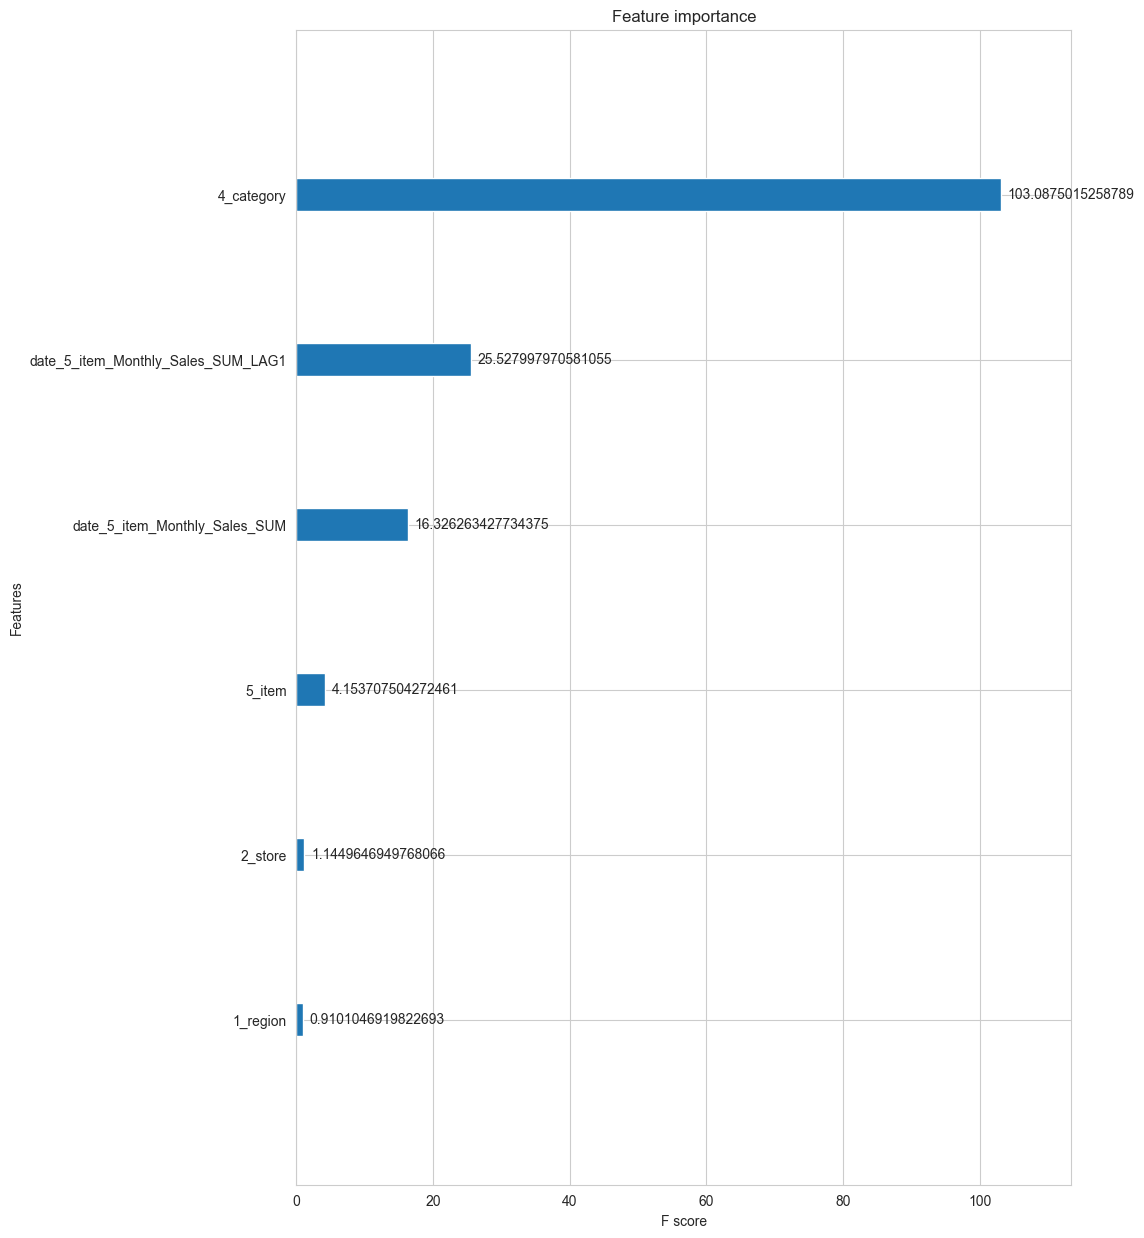

In [244]:
importance = model.get_booster().get_score(importance_type = "gain")
importance = {k: v for k, v in sorted(importance.items(), key = lambda item: item[1])}

fig, ax = plt.subplots(figsize = (10, 15))
xgb.plot_importance(model, importance_type = "gain", ax = ax);

In [246]:
Y_test_predict = model.predict(X_test)
Y_test_predict.sum()

8943.385